# **Simple Agent**
Here is quick example on how you can build ai agent with hypertic framework!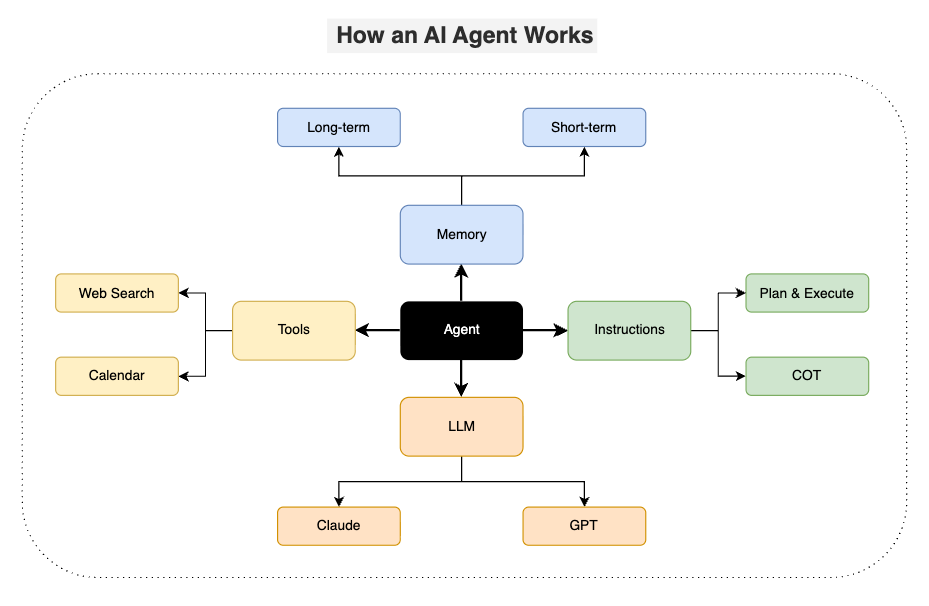

In [ ]:
!pip install hypertic openai ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 79.9 MB/s eta 0:00:00


In [ ]:
import os

from google.colab import userdata

os.environ["OPENAI_API_KEY"] = userdata.get("OPENAI_API_KEY")

In [ ]:
from datetime import datetime

from hypertic.agents import Agent
from hypertic.memory import InMemory
from hypertic.models import OpenAIChat
from hypertic.tools import DuckDuckGoTools, tool

# Create in-memory memory (use PostgreSQL/MongoDB in production)
memory = InMemory()

# Define ddgs tool
duckduckgo = DuckDuckGoTools(region="us-en", time="d")


# Define a custom tool
@tool
def today_date() -> str:
    """Returns the today's date in YYYY-MM-DD format."""
    return datetime.now().strftime("%Y-%m-%d")


# Create an agent
agent = Agent(
    model=OpenAIChat(model="gpt-5.2"),
    instructions="",  # If you want you can add instructions like planning or COT
    tools=[today_date, duckduckgo],
    memory=memory,
)

In [ ]:
# # Test with non streaming
# response = agent.run("what is today's date?")
# print(f"full response: {response}")
# print(f"Final response: {response.content}")
# print(f"Final tool calls: {response.tool_calls}")
# print(f"Final tool outputs: {response.tool_outputs}")
# print(f"Final metadata: {response.metadata}")

In [ ]:
# Define userid and sessionid
user_id = "user1"
session_id = "session1"

while True:
    user_input = input("You: ").strip()
    if user_input.lower() in ["quit", "exit", "q"]:
        break
    if not user_input:
        continue

    print("\nAssistant: ", end="", flush=True)

    try:
        for event in agent.stream(user_input, session_id=session_id, user_id=user_id):
            if event.type == "content":
                print(event.content, end="", flush=True)
        print("\n")  # spacing after the response
    except Exception as e:
        print(f"\nError: {e}\n")

You: hello

Assistant: Hello—what would you like to do?

You: tell me a todays date

Assistant: Today’s date is **2026-01-19**.

You: tell me latest news on ai

Assistant: Here are some of the latest AI-related headlines (as of **2026-01-19**):

- **Reuters:** *South Korea's Lee, Italy's Meloni agree to strengthen cooperation in AI, chips* https://www.msn.com/en-us/politics/international-relations/south-korea-s-lee-italy-s-meloni-agree-to-strengthen-cooperation-in-ai-chips/ar-AA1Utv2O- **BBC (via MSN):** *Police investigate reports of “explicit” AI images at County Armagh school* https://www.msn.com/en-us/news/world/police-investigate-reports-of-explicit-ai-images-at-county-armagh-school/ar-AA1UsAgZ- **People (via Yahoo News):** *“Matilda” star Mara Wilson says it was a “living nightmare” to have her image…* (about AI image misuse) https://www.yahoo.com/news/articles/matilda-star-mara-wilson-says-003357960.htmlIf you tell me what you care about (policy, research breakthroughs, business

This notebook demonstrated the key features of Hypertic like tools,


### **Resources**
- Examples: [https://github.com/hypertic-ai/hypertic/examples](https://github.com/hypertic-ai/hypertic/blob/main/examples)
- Documentation: [https://docs.hypertic.ai](https://docs.hypertic.ai)



Happy Building! 🚀